In [60]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [61]:
data = pd.read_csv('data/2330.csv')
data

,Date,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,MA5,MA10,DIF,MACD9,OSC,K,D
0,2011/7/20,69.7,71.7,69.4,71.6,70.08,70.83,71.79,74.02,58272,59446,55917,-1.15,-1.00,-0.15,32.35%,26.05%
1,2011/7/21,71.4,71.6,70.6,71.6,70.26,70.83,71.66,74.05,33277,55219,54470,-1.04,-1.01,-0.03,46.77%,32.96%
2,2011/7/22,72.4,72.4,71.7,72.0,70.68,70.78,71.62,74.04,38244,45044,52998,-0.88,-0.98,0.10,60.35%,42.09%
3,2011/7/25,72.4,72.5,71.4,72.0,71.14,70.85,71.62,74.02,34963,44443,51283,-0.76,-0.94,0.18,69.40%,51.19%
4,2011/7/26,72.3,73.7,72.3,73.7,72.18,71.19,71.68,74.03,53159,43583,52599,-0.54,-0.86,0.32,79.60%,60.66%
5,2011/7/27,73.7,73.9,73.0,73.4,72.54,71.31,71.78,74.01,45636,41056,50251,-0.36,-0.76,0.40,83.31%,68.21%
6,2011/7/28,72.8,73.4,72.3,73.0,72.82,71.54,71.82,74.00,33721,41145,48182,-0.25,-0.66,0.41,83.32%,73.25%
7,2011/7/29,71.8,72.4,71.3,72.0,72.82,71.75,71.78,73.95,60693,45634,45339,-0.24,-0.57,0.33,77.15%,74.55%
8,2011/8/1,72.0,72.8,72.0,72.6,72.94,72.04,71.73,73.91,41139,46870,45656,-0.19,-0.50,0.31,75.14%,74.74%
9,2011/8/2,72.0,72.1,71.2,71.4,72.48,72.33,71.64,73.84,33521,42942,43263,-0.22,-0.44,0.22,58.17%,69.22%


In [62]:
data.shape

(1661, 17)

In [63]:
price = data.Close.values.astype('float32')
price = price.reshape(1661,1)

price.shape

(1661, 1)

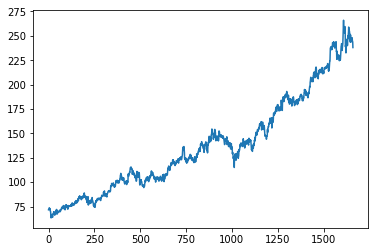

In [64]:
plt.plot(price)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))

price = scaler.fit_transform(price)

In [65]:
train_size = int(len(price) * 0.80)
test_size  = len(price) - train_size
train , test = price[0:train_size , :], price[train_size:len(price), :]

print(len(train) , len(test))

1328 333


In [66]:
predictions[0:3]

[0.57206696, 1.1365966, 2.1939142]

In [79]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)- look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    
    return np.array(dataX),np.array(dataY)

In [84]:
look_back = 1
trainX , trainY = create_dataset(train, look_back)
testX , testY = create_dataset(test, look_back)

In [85]:
trainX = np.reshape(trainX , (trainX.shape[0], 1, trainX.shape[1]))
testX  = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [86]:
model = Sequential()

model.add(LSTM(
            input_dim = 1,
            output_dim = 50,
            return_sequences = True ))
model.add(Dropout(0.2))


model.add(LSTM(
            100,
            return_sequences = False ))
model.add(Dropout(0.2))

model.add(Dense(
            output_dim = 1))
model.add(Activation('linear'))


start = time.time()
model.compile(loss = 'mse' , optimizer = 'rmsprop')
print('compilation time : ', time.time() - start)





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  


compilation time :  0.012891054153442383


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


In [95]:
model.fit(trainX, trainY, batch_size=64, nb_epoch=100, validation_split=0.2)

Train on 1060 samples, validate on 266 samples
Epoch 1/100
1060/1060 [==============================] - 0s 119us/step - loss: 2.7422e-04 - val_loss: 5.6533e-04
Epoch 2/100
 512/1060 [=============>................] - ETA: 0s - loss: 2.6104e-04

/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


1060/1060 [==============================] - 0s 131us/step - loss: 2.5857e-04 - val_loss: 1.1709e-04
Epoch 3/100
1060/1060 [==============================] - 0s 120us/step - loss: 3.0115e-04 - val_loss: 1.2846e-04
Epoch 4/100
1060/1060 [==============================] - 0s 119us/step - loss: 2.6774e-04 - val_loss: 1.6478e-04
Epoch 5/100
1060/1060 [==============================] - 0s 123us/step - loss: 2.6886e-04 - val_loss: 1.1727e-04
Epoch 6/100
1060/1060 [==============================] - 0s 125us/step - loss: 2.7140e-04 - val_loss: 1.2019e-04
Epoch 7/100
1060/1060 [==============================] - 0s 130us/step - loss: 2.6575e-04 - val_loss: 2.0499e-04
Epoch 8/100
1060/1060 [==============================] - 0s 114us/step - loss: 2.5692e-04 - val_loss: 1.8684e-04
Epoch 9/100
1060/1060 [==============================] - 0s 137us/step - loss: 2.5815e-04 - val_loss: 1.3913e-04
Epoch 10/100
1060/1060 [==============================] - 0s 125us/step - loss: 2.7713e-04 - val_loss: 4.278

1060/1060 [==============================] - 0s 140us/step - loss: 2.1068e-04 - val_loss: 1.3259e-04
Epoch 75/100
1060/1060 [==============================] - 0s 121us/step - loss: 2.3027e-04 - val_loss: 1.2972e-04
Epoch 76/100
1060/1060 [==============================] - 0s 134us/step - loss: 2.3727e-04 - val_loss: 1.3354e-04
Epoch 77/100
1060/1060 [==============================] - 0s 141us/step - loss: 2.5610e-04 - val_loss: 1.3935e-04
Epoch 78/100
1060/1060 [==============================] - 0s 130us/step - loss: 2.4050e-04 - val_loss: 1.1912e-04
Epoch 79/100
1060/1060 [==============================] - 0s 134us/step - loss: 2.3351e-04 - val_loss: 1.1769e-04
Epoch 80/100
1060/1060 [==============================] - 0s 151us/step - loss: 2.5698e-04 - val_loss: 1.1630e-04
Epoch 81/100
1060/1060 [==============================] - 0s 150us/step - loss: 2.0598e-04 - val_loss: 1.4671e-04
Epoch 82/100
1060/1060 [==============================] - 0s 129us/step - loss: 2.2941e-04 - val_loss

In [96]:
testX[0]

array([[0.5707943]], dtype=float32)

[[0.567563]]
[[1.0993252]]
[[2.0443246]]
[[3.400707]]
[[4.584143]]
[[178.34502]
 [286.13324]
 [477.6846 ]
 [752.6233 ]
 [992.5058 ]]


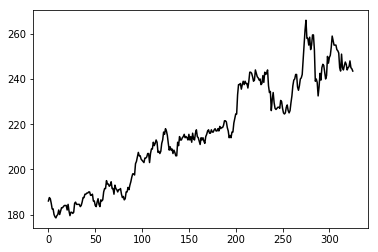

In [104]:
def plot_results_multiple(predicted_data, true_data, length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length :],color='black')
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:],color='red')
    plt.show()
    

def predict_sequences_multiple(model, firstValue, length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range (length):
        predicted = []
        
        print(model.predict(curr_frame[newaxis, :, :]))
        predicted.append(model.predict(curr_frame[newaxis, :, :])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs


predict_length = 5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)


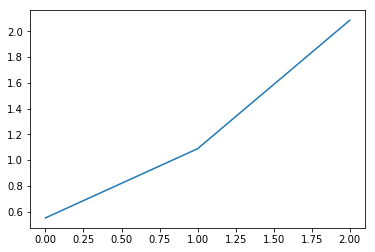

In [92]:
plt.plot(predictions)

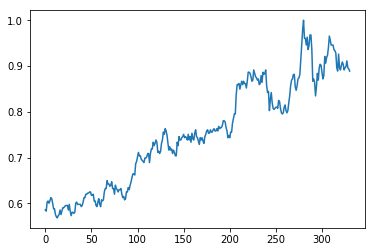

In [78]:
plt.plot(testY)